# Import Packages

In [1]:
library(dplyr)
library(tidyr)
library(IDPmisc)
library(ggplot2)
library(repr) # options() to change size of plot image
library(gridExtra) # side-by-side plots


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Import Data

* The data was retrieved from the (BioLINCC)[https://biolincc.nhlbi.nih.gov/teaching/]
* Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Levels (if applicable)/<br> Notes|
| --- | --- |---|
|RANDID | Unique identification number for each participant||
|SEX | Participant sex |1=Men <br> 2=Women|
|PERIOD|Examination Cycle|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|TIME| Number of days since baseline exam||
|AGE|AGE at exam (years)||
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|BPMEDS|Use of Anti-hypertensive medication at exam|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)||
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared||
|GLUCOSE|Casual serum GLUCOSE (mg/dL)||
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual GLUCOSE <br> of 200 mg/dL or more|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral HemorrhAGE, <br> or Subarachnoid HemorrhAGE, <br> or Fatal Cerebrovascular Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [1]:
framingham = read.csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/wozU-DataSci/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na.strings = ".")
head(framingham)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,⋯,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2448,1,195,39,106.0,70.0,0,0,26.97,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,2448,1,209,52,121.0,66.0,0,0,NA,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
3,6238,2,250,46,121.0,81.0,0,0,28.73,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,260,52,105.0,69.5,0,0,29.43,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
5,6238,2,237,58,108.0,66.0,0,0,28.50,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6,9428,1,245,48,127.5,80.0,1,20,25.34,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
str(framingham)

'data.frame':	11627 obs. of  39 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ educ    : int  4 4 2 2 2 1 1 3 3 3 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ TIME    : int  0 4628 0 2156 4344 0 2199 0 1977 0 ...

# Data Wrangling

## Select Columns of interest

In [4]:
keep=c('RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 
       'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH')
framingham1 = framingham[keep]
str(framingham1)

'data.frame':	11627 obs. of  18 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ PERIOD  : int  1 3 1 2 3 1 2 1 2 1 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ ANYCHD  : int  1 1 0 0 0 0 0 0 0 0 ...
 $ STROKE  : int  0 0 0 0 0 0 0 1 1 0 ...
 $ DEATH   : int  0 0 0 0 0 0 0 1 1 0 ...


## Split Dataset into Periods 1, 2, 3; Remove NAs

In [5]:
framinghamP1 = framingham1 %>% filter(PERIOD == 1)
framinghamP1 = subset(framinghamP1, select  = - PERIOD)
framinghamP1 = NaRV.omit(framinghamP1)
rownames(framinghamP1) = NULL
head(framinghamP1)

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2448,1,39,106.0,70,0,0,0,195,26.97,77,0,80,0,1,0,0
2,6238,2,46,121.0,81,0,0,0,250,28.73,76,0,95,0,0,0,0
3,9428,1,48,127.5,80,0,1,20,245,25.34,70,0,75,0,0,0,0
4,10552,2,61,150.0,95,0,1,30,225,28.58,103,0,65,1,0,1,1
5,11252,2,46,130.0,84,0,1,23,285,23.10,85,0,85,0,0,0,0
6,11263,2,43,180.0,110,0,0,0,228,30.30,99,0,77,1,1,0,0


In [28]:
framinghamP2 = framingham1 %>% filter(PERIOD == 2)
framinghamP2 = subset(framinghamP2, select  = - PERIOD)
framinghamP2 = NaRV.omit(framinghamP2)
rownames(framinghamP2) = NULL
head(framinghamP2)

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6238,2,52,105,69.5,0,0,0,260,29.43,86,0,80,0,0,0,0
2,9428,1,54,141,89.0,0,1,30,283,25.34,87,0,75,0,0,0,0
3,10552,2,67,183,109.0,0,1,20,232,30.18,89,0,60,1,0,1,1
4,11252,2,51,109,77.0,0,1,30,343,23.48,72,0,90,0,0,0,0
5,11263,2,49,177,102.0,1,0,0,230,31.36,86,0,120,1,1,0,0
6,12629,2,70,149,81.0,0,0,0,220,36.76,98,0,80,1,1,0,0


In [27]:
framinghamP3 = framingham1 %>% filter(PERIOD == 3)
framinghamP3 = subset(framinghamP3, select  = - PERIOD)
framinghamP3 = NaRV.omit(framinghamP3)
rownames(framinghamP3) = NULL
head(framinghamP3)

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6238,2,58,108,66,0,0,0,237,28.50,71,0,80,0,0,0,0
2,11263,2,55,180,106,1,0,0,220,31.17,81,1,86,1,1,0,0
3,12806,2,57,110,46,0,1,30,320,22.02,87,0,75,0,0,0,0
4,14367,1,64,168,100,0,0,0,280,25.72,82,0,92,1,0,0,0
5,16365,1,55,173,123,1,0,0,211,29.11,85,0,75,1,0,0,0
6,23727,2,53,124,78,0,0,0,159,26.62,135,0,68,1,0,0,1


# <font color = blue> __Statistical Analyses - Continuous Variables__ </font>
***
### 1. How do demographic and behavioral factors influence the risk for heart disease?

* DV: __ANYCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __AGE__
    * __CIGPDAY__
    
### 2. How do health metrics influence a diagnosis of heart disease?
* DV: __ANYCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __TOTCHOL__
    * __SYSBP__
    * __DIABP__
    * __BMI__
    * __HEARTRTE__
    * __GLUCOSE__

### 3. How do demographic and behavioral factors influence the risk for death

* DV: __DEATH__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __AGE__
    * __CIGPDAY__
    
### 4. How do health metrics influence the risk for death?
* DV: __DEATH__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __TOTCHOL__
    * __SYSBP__
    * __DIABP__
    * __BMI__
    * __HEARTRTE__
    * __GLUCOSE__

### 5. Data wrangling note:
* DV must be recoded to 0/1, this is already the case

### Data Wrangling: Subset data to variables of interest

In [29]:
keep = c('AGE', 'CIGPDAY', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'HEARTRTE', 'GLUCOSE', 'ANYCHD')
logitdfP1 = framinghamP1[keep]
logitdfP2 = framinghamP2[keep]
logitdfP3 = framinghamP3[keep]

## Checking Assumptions

### 1. AGE

### Sample Size Assumption

In [40]:
# Run base logistic model
mylogit_AGEP1 = glm(ANYCHD ~ AGE, data=logitdfP1, family="binomial")
mylogit_AGEP2 = glm(ANYCHD ~ AGE, data=logitdfP2, family="binomial")
mylogit_AGEP3 = glm(ANYCHD ~ AGE, data=logitdfP3, family="binomial")

In [41]:
# Predict heart disease
probabilities_AGEP1 = predict(mylogit_AGEP1, type = "response")
probabilities_AGEP2 = predict(mylogit_AGEP2, type = "response")
probabilities_AGEP3 = predict(mylogit_AGEP3, type = "response")

### Plotting Probabilities

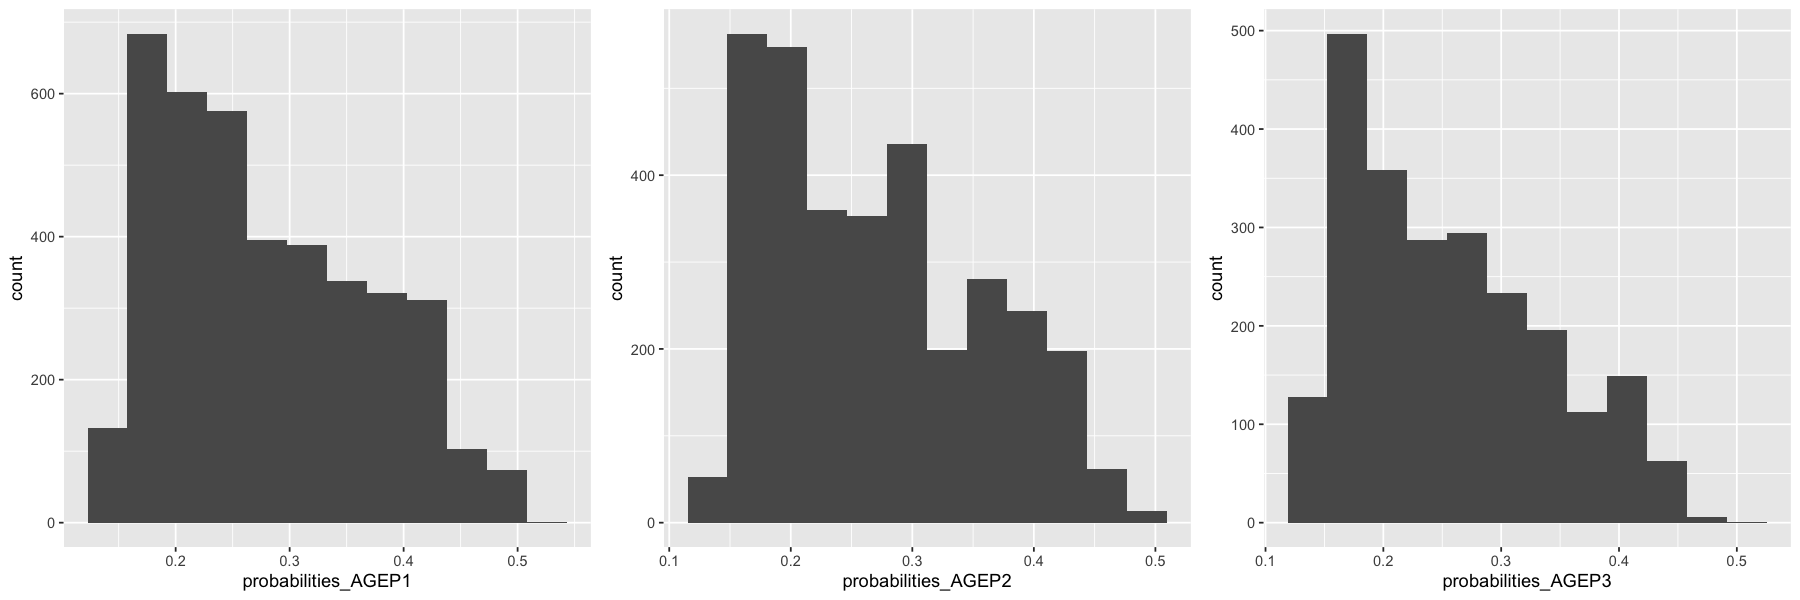

In [42]:
probdf1=data.frame(probabilities_AGEP1)
probdf2=data.frame(probabilities_AGEP2)
probdf3=data.frame(probabilities_AGEP3)

options(repr.plot.width=15, repr.plot.height=5)
a=ggplot(probdf1, aes(x=probabilities_AGEP1)) + geom_histogram(bins=12)
b=ggplot(probdf2, aes(x=probabilities_AGEP2)) + geom_histogram(bins=12)
c=ggplot(probdf3, aes(x=probabilities_AGEP3)) + geom_histogram(bins=12)
grid.arrange(a, b, c, ncol = 3)

In [44]:
framinghamP1$probabilities_AGEP1 = probabilities_AGEP1
head(framinghamP1)

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH,probabilities_AGEP1
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2448,1,39,106.0,70,0,0,0,195,26.97,77,0,80,0,1,0,0,0.1746712
2,6238,2,46,121.0,81,0,0,0,250,28.73,76,0,95,0,0,0,0,0.2333067
3,9428,1,48,127.5,80,0,1,20,245,25.34,70,0,75,0,0,0,0,0.2523764
4,10552,2,61,150.0,95,0,1,30,225,28.58,103,0,65,1,0,1,1,0.3985361
5,11252,2,46,130.0,84,0,1,23,285,23.10,85,0,85,0,0,0,0,0.2333067
6,11263,2,43,180.0,110,0,0,0,228,30.30,99,0,77,1,1,0,0,0.2066290


In [81]:
framinghamP1 %>% group_by(ANYCHD) %>% summarise(count = n(), medianProb = median(probabilities_AGEP1), meanProb = mean(probabilities_AGEP1), stdev= sd(probabilities_AGEP1), Max = max(probabilities_AGEP1), Min = min(probabilities_AGEP1))

ANYCHD,count,medianProb,meanProb,stdev,Max,Min
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2826,0.2523764,0.2692066,0.08696055,0.5008632,0.1283060
1,1101,0.3043666,0.3090119,0.09113950,0.5138291,0.1403646


In [108]:
framinghamP2 %>% group_by(ANYCHD) %>% summarise(count = n(), medianProb = median(probabilities_AGEP2), meanProb = mean(probabilities_AGEP2), stdev= sd(probabilities_AGEP2), Max = max(probabilities_AGEP1), Min = min(probabilities_AGEP1))

ANYCHD,count,medianProb,meanProb,stdev,Max,Min
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2412,0.2496411,0.2710789,0.08662469,0.5138291,0.128306
1,897,0.2496411,0.2710789,0.08662469,0.5138291,0.128306


In [109]:
framinghamP3 %>% group_by(ANYCHD) %>% summarise(count = n(), medianProb = median(probabilities_AGEP3), meanProb = mean(probabilities_AGEP3), stdev= sd(probabilities_AGEP3), Max = max(probabilities_AGEP3), Min = min(probabilities_AGEP3))

ANYCHD,count,medianProb,meanProb,stdev,Max,Min
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1728,0.245794,0.2564544,0.08328994,0.4960507,0.1231037
1,596,0.245794,0.2564544,0.08328994,0.4960507,0.1231037


In [110]:
logitdfP1$Predicted_AGE = ifelse(probabilities_AGEP1 > .5, 1, 0)
logitdfP2$Predicted_AGE = ifelse(probabilities_AGEP2 > .5, 1, 0)
logitdfP3$Predicted_AGE = ifelse(probabilities_AGEP3 > .5, 1, 0)

In [106]:
# Create confusion matrix
conf_mat_Predicted_AGE_P1 <- caret::confusionMatrix(as.factor(logitdfP1$Predicted_AGE), as.factor(logitdfP1$ANYCHD))
conf_mat_Predicted_AGE_P1

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2287  724
         1  539  377
                                         
               Accuracy : 0.6784         
                 95% CI : (0.6635, 0.693)
    No Information Rate : 0.7196         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1599         
                                         
 Mcnemar's Test P-Value : 2.249e-07      
                                         
            Sensitivity : 0.8093         
            Specificity : 0.3424         
         Pos Pred Value : 0.7595         
         Neg Pred Value : 0.4116         
             Prevalence : 0.7196         
         Detection Rate : 0.5824         
   Detection Prevalence : 0.7667         
      Balanced Accuracy : 0.5758         
                                         
       'Positive' Class : 0              
                                         

In [111]:
# Create confusion matrix
conf_mat_Predicted_AGE_P2 <- caret::confusionMatrix(as.factor(logitdfP2$Predicted_AGE), as.factor(logitdfP2$ANYCHD))
conf_mat_Predicted_AGE_P2

Warning message in confusionMatrix.default(as.factor(logitdfP2$Predicted_AGE), as.factor(logitdfP2$ANYCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2412  897
         1    0    0
                                         
               Accuracy : 0.7289         
                 95% CI : (0.7134, 0.744)
    No Information Rate : 0.7289         
    P-Value [Acc > NIR] : 0.509          
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.7289         
         Neg Pred Value :    NaN         
             Prevalence : 0.7289         
         Detection Rate : 0.7289         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
                                         

In [112]:
# Create confusion matrix
conf_mat_Predicted_AGE_P3 <- caret::confusionMatrix(as.factor(logitdfP3$Predicted_AGE), as.factor(logitdfP3$ANYCHD))
conf_mat_Predicted_AGE_P3

Warning message in confusionMatrix.default(as.factor(logitdfP3$Predicted_AGE), as.factor(logitdfP3$ANYCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1728  596
         1    0    0
                                          
               Accuracy : 0.7435          
                 95% CI : (0.7253, 0.7612)
    No Information Rate : 0.7435          
    P-Value [Acc > NIR] : 0.511           
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7435          
         Neg Pred Value :    NaN          
             Prevalence : 0.7435          
         Detection Rate : 0.7435          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells <5, so this variable does not meet the minimum sample size for logistic regression*__

### Logit Linearity

In [113]:
# Creating the predictors vector
predictorsP1 = colnames(logitdfP1)
predictorsP2 = colnames(logitdfP2)
predictorsP3 = colnames(logitdfP3)

In [115]:
# Creating the logit
logitdfP1_1 = logitdfP1 %>% mutate(logit=log(probabilities_AGEP1/(1-probabilities_AGEP1))) %>% gather(key= "predictorsP1", value="predictor.value", -logit)
logitdfP2_1 = logitdfP2 %>% mutate(logit=log(probabilities_AGEP2/(1-probabilities_AGEP2))) %>% gather(key= "predictorsP2", value="predictor.value", -logit)
logitdfP3_1 = logitdfP3 %>% mutate(logit=log(probabilities_AGEP3/(1-probabilities_AGEP3))) %>% gather(key= "predictorsP3", value="predictor.value", -logit)

In [117]:
logitdfP1_1

logit,predictorsP3,predictor.value
<dbl>,<chr>,<dbl>
-1.2264456,AGE,58
-1.3843562,AGE,55
-1.2790825,AGE,57
-0.9106244,AGE,64
-1.3843562,AGE,55
-1.4896299,AGE,53
-1.5949037,AGE,51
-1.1211719,AGE,60
-1.7001774,AGE,49


ERROR while rich displaying an object: Error: At least one layer must contain all faceting variables: `predictors`.
* Plot is missing `predictors`
* Layer 1 is missing `predictors`
* Layer 2 is missing `predictors`

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_

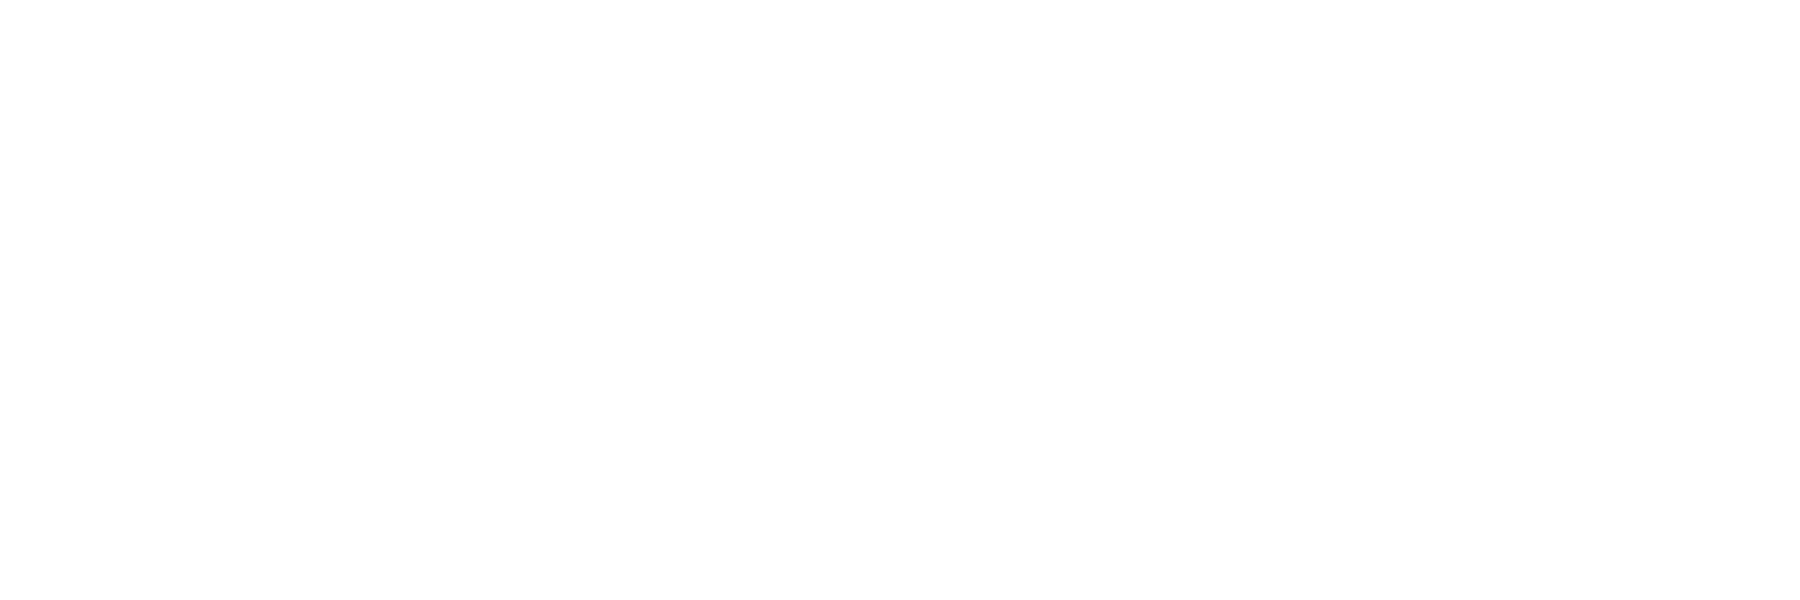

In [116]:
# Plotting to determine linearity, Period 1
ggplot(logitdfP1_1, aes(logit, predictor.value))+
    geom_point(size=.5, alpha=.5)+
    geom_smooth(method= "loess")+
    theme_bw()+
    facet_wrap(~predictors, scales="free_y")

In [ ]:
# Plotting to determine linearity, Period 2
ggplot(logitdfP2_1, aes(logit, predictor.value))+
    geom_point(size=.5, alpha=.5)+
    geom_smooth(method= "loess")+
    theme_bw()+
    facet_wrap(~predictors, scales="free_y")

In [ ]:
# Plotting to determine linearity, Period 3
ggplot(logitdfP3_1, aes(logit, predictor.value))+
    geom_point(size=.5, alpha=.5)+
    geom_smooth(method= "loess")+
    theme_bw()+
    facet_wrap(~predictors, scales="free_y")

### 2. Cigarettes per Day

In [ ]:
logitdf = framingham[keep]
mylogit_CIGPDAY = glm(ANYCHD ~ CIGPDAY, data=logitdf, family="binomial")

In [ ]:
# Predict risk for heart disease
probabilities_CIGPDAY = predict(mylogit_CIGPDAY, type = "response")
logitdf$Predicted_CIGPDAY <- ifelse(probabilities_CIGPDAY > .5, 1, 0)

In [ ]:
# Create confusion matrices
conf_mat_Predicted_CIGPDAY <- caret::confusionMatrix(as.factor(logitdf$Predicted_CIGPDAY), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_CIGPDAY 

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [ ]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [ ]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_CIGPDAY/(1-probabilities_CIGPDAY))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

In [ ]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 3. Total Cholesterol

In [ ]:
logitdf = framingham[keep]
mylogit_TOTCHOL = glm(ANYCHD ~ TOTCHOL, data=logitdf, family="binomial")

In [ ]:
# Predict risk for heart disease
probabilities_TOTCHOL = predict(mylogit_TOTCHOL, type = "response")
logitdf$Predicted_TOTCHOL <- ifelse(probabilities_TOTCHOL > .5, 1, 0)

In [ ]:
# Create confusion matrices
conf_mat_Predicted_TOTCHOL <- caret::confusionMatrix(as.factor(logitdf$Predicted_TOTCHOL), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_TOTCHOL 

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [ ]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [ ]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_TOTCHOL/(1-probabilities_TOTCHOL))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

In [ ]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 4. Systolic Blood Pressure

In [ ]:
logitdf = framingham[keep]
mylogit_SYSBP = glm(ANYCHD ~ SYSBP, data=logitdf, family="binomial")

In [ ]:
# Predict risk for heart disease
probabilities_SYSBP = predict(mylogit_SYSBP, type = "response")
logitdf$Predicted_SYSBP <- ifelse(probabilities_SYSBP > .5, 1, 0)

In [ ]:
# Create confusion matrices
conf_mat_Predicted_SYSBP <- caret::confusionMatrix(as.factor(logitdf$Predicted_SYSBP), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_SYSBP

__*All cells that are >=5, so this variable meets the minimum smaple size for logistic regression*__

### Logit Linearity

In [ ]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [ ]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_SYSBP/(1-probabilities_SYSBP))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

In [ ]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 5. Diastolic Blood Pressure

In [ ]:
logitdf = framingham[keep]
mylogit_DIABP = glm(ANYCHD ~ DIABP, data=logitdf, family="binomial")

In [ ]:
# Predict risk for heart disease
probabilities_DIABP = predict(mylogit_DIABP, type = "response")
logitdf$Predicted_DIABP <- ifelse(probabilities_DIABP > .5, 1, 0)

In [ ]:
# Create confusion matrices
conf_mat_Predicted_DIABP <- caret::confusionMatrix(as.factor(logitdf$Predicted_DIABP), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_DIABP 

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [ ]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [ ]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_DIABP/(1-probabilities_DIABP))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

In [ ]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 6. BMI

In [ ]:
logitdf = framingham[keep]
mylogit_BMI = glm(ANYCHD ~ BMI, data=logitdf, family="binomial")

In [ ]:
# Predict risk for heart disease
probabilities_BMI = predict(mylogit_BMI, type = "response")
logitdf$Predicted_BMI <- ifelse(probabilities_BMI > .5, 1, 0)

In [ ]:
# Create confusion matrix
conf_mat_Predicted_BMI <- caret::confusionMatrix(as.factor(logitdf$Predicted_BMI), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_BMI

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [ ]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [ ]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_BMI/(1-probabilities_BMI))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

In [ ]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 7. Heart Rate

In [ ]:
logitdf = framingham[keep]
mylogit_HEARTRTE = glm(ANYCHD ~ HEARTRTE, data=logitdf, family="binomial")

In [ ]:
# Predict risk for heart disease
probabilities_HEARTRTE = predict(mylogit_HEARTRTE, type = "response")
logitdf$Predicted_HEARTRTE <- ifelse(probabilities_HEARTRTE > .5, 1, 0)

In [ ]:
# Create confusion matrices
conf_mat_Predicted_HEARTRTE <- caret::confusionMatrix(as.factor(logitdf$Predicted_HEARTRTE ), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_HEARTRTE

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [ ]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [ ]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_HEARTRTE/(1-probabilities_HEARTRTE))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

In [ ]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 8. GLUCOSE

In [ ]:
logitdf = framingham[keep]
mylogit_GLUCOSE = glm(ANYCHD ~ GLUCOSE, data=logitdf, family="binomial")

In [ ]:
# Predict risk for heart disease
probabilities_GLUCOSE = predict(mylogit_GLUCOSE, type = "response")
logitdf$Predicted_GLUCOSE <- ifelse(probabilities_GLUCOSE > .5, 1, 0)

In [ ]:
# Create confusion matrices
conf_mat_Predicted_GLUCOSE <- caret::confusionMatrix(as.factor(logitdf$Predicted_GLUCOSE), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_GLUCOSE

__*All cells  are >=5, so this variable meets the minimum smaple size for logistic regression*__

### Logit Linearity

In [ ]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [ ]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_GLUCOSE/(1-probabilities_GLUCOSE))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

In [ ]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

*All of the variables that meet the logit linearity (with ANYCHD) assumption except __DIABP__, which has a pronounced curved in the ANYCHD graph.*

### Independent Errors Assumption

In [ ]:
plot(mylogit_AGE$residuals) 
plot(mylogit_CIGPDAY$residuals) 
plot(mylogit_TOTCHOL$residuals) 
plot(mylogit_SYSBP$residuals) 
plot(mylogit_DIABP$residuals) 
plot(mylogit_BMI$residuals) 
plot(mylogit_HEARTRTE$residuals) 
plot(mylogit_GLUCOSE$residuals)

__*The points are evenly distributed  accross the x axis for all of the variables, so all of them meet the assumption of independence of errors*__

### Durbin-Watson Test to confirm indeoendence of errors

In [ ]:
library(lmtest)

In [ ]:
dwtest(mylogit_AGE, alternative="two.sided")
dwtest(mylogit_CIGPDAY, alternative="two.sided")
dwtest(mylogit_TOTCHOL, alternative="two.sided")
dwtest(mylogit_SYSBP, alternative="two.sided")
dwtest(mylogit_DIABP, alternative="two.sided")
dwtest(mylogit_BMI, alternative="two.sided")
dwtest(mylogit_HEARTRTE, alternative="two.sided")
dwtest(mylogit_GLUCOSE, alternative="two.sided")

__*None of the tests are statistically significant, which confirms that all of the errors are independent*__

### Screening for outliers

In [ ]:
infl_mylogit_AGE = influence.measures(mylogit_AGE) 
summary(infl_mylogit_AGE)

In [ ]:
infl_mylogit_CIGPDAY = influence.measures(mylogit_CIGPDAY) 
summary(infl_mylogit_CIGPDAY)

In [ ]:
infl_mylogit_TOTCHOL = influence.measures(mylogit_TOTCHOL) 
summary(infl_mylogit_TOTCHOL)

In [ ]:
infl_mylogit_SYSBP = influence.measures(mylogit_SYSBP) 
summary(infl_mylogit_SYSBP)

In [ ]:
infl_mylogit_DIABP = influence.measures(mylogit_DIABP) 
summary(infl_mylogit_DIABP)

In [ ]:
infl_mylogit_BMI = influence.measures(mylogit_BMI) 
summary(infl_mylogit_BMI)

In [ ]:
infl_mylogit_HEARTRTE = influence.measures(mylogit_HEARTRTE) 
summary(infl_mylogit_HEARTRTE)

In [ ]:
infl_mylogit_GLUCOSE = influence.measures(mylogit_GLUCOSE)
summary(infl_mylogit_GLUCOSE)

## Assumption Checking Summary
* The variables that meet the sample size assumption are __GLUCOSE__ and __SYSBP__
* The variables that meet the logit linearity assumption are __AGE__, __BMI__, __CIGPDAY__, __SYSBP__, __HEARTRTE__, and __TOTCHOL__.
* All of the variables have independent errors
* Multicollinearity: we noted in the exploratory data analysis that SYSBP and DIABP are strongly correlated, so we will have to eliminate one of them
* None of the variables have outliers:
    * dfb.1_ and dffit values are less than 1
    * hat < .3

In [ ]:
summary(mylogit_SYSBP)

In [ ]:
coef(mylogit_SYSBP)

***
## If all of the variables had met the assumptions
### Method based on [www.utstat.toronto.edu](http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11StepwiseLogisticR.pdf)

### Run the full model

#### Dropping DIABP due to multicollinearity 

In [ ]:
head(logitdf)

In [ ]:
logitdfLR = subset(logitdf, select = -c(DIABP, Predicted_GLUCOSE))
head(logitdfLR)

In [ ]:
fullmod = glm(ANYCHD ~ ., data = logitdfLR,family=binomial)
summary(fullmod)

__*It seems that AGE, cigarretes per day, total cholesterol, systolic blood pressure, and GLUCOSE are the only factors that are significant predictors*__

In [ ]:
nullmodel = glm(ANYCHD ~ 1, data = logitdfLR, family=binomial)
summary(nullmodel)

In [ ]:
backwards = step(fullmod)

In [ ]:
summary(backwards)

In [ ]:
forwards = step(nullmodel,scope=list(lower=formula(nullmodel),upper=formula(fullmod)), direction="forward")

In [ ]:
summary(forwards)

In [ ]:
bothways = step(nullmodel, list(lower=formula(nullmodel),upper=formula(fullmod)),direction="both",trace=0)
summary(bothways)

In [ ]:
formula(backwards)

In [ ]:
formula(forwards)

In [ ]:
formula(bothways)

## Method based on [www.sthda.com](http://www.sthda.com/english/articles/36-classification-methods-essentials/150-stepwise-logistic-regression-essentials-in-r/)

### Load libraries

In [ ]:
library("caret")
library("MASS")
library("tidyverse")

In [ ]:
head(logitdfLR)

### Split the data into training and test set

In [ ]:
training.samples = logitdfLR$ANYCHD %>% createDataPartition(p= 0.8, list = FALSE)
train.data  <- logitdfLR[training.samples, ]
test.data <- logitdfLR[-training.samples, ]

### Fit the model

In [ ]:
# stepAIC function: default direction is backward - arg: direction = c("both", "backward", "forward")
mylogit  = glm(ANYCHD ~ ., data = train.data, family = binomial) %>% stepAIC(trace = FALSE)
summary(mylogit)

### Predict Probabilities Risk/No Risk for heart disease

In [ ]:
probabilities <- mylogit %>% predict(test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)

### Model Accuracy

In [ ]:
# Model accuracy
mean(predicted.classes==test.data$ANYCHD)

In [ ]:
mean(train.data$ANYCHD)

### Full Model

In [ ]:
full.model <- glm(ANYCHD ~., data = train.data, family = binomial)
summary(full.model)

### Stepwise Selection

In [ ]:
step.model <- full.model %>% stepAIC(trace = FALSE)
summary(step.model)

### Compare the full and the stepwise models

#### 1. Full Model

In [ ]:
# Make predictions
probabilities <- full.model %>% predict(test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
# Prediction accuracy
observed.classes <- test.data$ANYCHD
mean(predicted.classes == observed.classes)

#### 2. Stepwise Model

In [ ]:
# Make predictions
probabilities <- predict(step.model, test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
# Prediction accuracy
observed.classes <- test.data$ANYCHD
mean(predicted.classes == observed.classes)

### The stepwise model is best because it is less complex and achieves the same accuracy. Also, the full model includes variables that are not significant predictors of the CHD risk (p value > .05).